In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [80]:
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

In [101]:
def P(alpha,r):
    return np.exp(-2*alpha*r)

In [102]:
def w(alpha,x1st,x2nd):
    return P(alpha,x2nd)/P(alpha,x1st)

In [136]:
def Q(x1,xi):
    
    return (3+2*xi)/(4+x1)

In [143]:
def Metropolice(alpha,n,x1, xi,step):
    points=[x1]

    for j in range(n):
        a = w(alpha,x1,xi)* Q(x1,xi)/Q(xi,x1)
        rand= np.random.rand()

        if a >=1 or a>=rand :
            points.append(xi)
            newrand=  np.random.rand()*step
            while newrand==0:
                newrand= np.random.rand()*step
            x1, xi= xi, newrand

        else :
            points.append(x1)
            

    return points
        
        


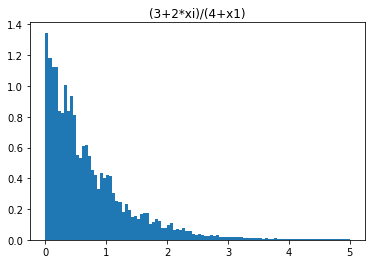

In [144]:
points=Metropolice(1,1000000,.2,.3,5)
plt.title('(3+2*xi)/(4+x1)')
plt.hist(points, bins=100, density=True);

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [4]:
# Your code here

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [43]:
from scipy.fft import fft, fftshift, fftfreq

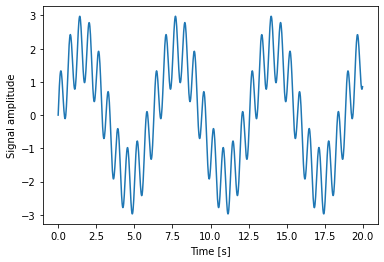

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

f_s = 500 # Sampling rate, or number of measurements per second

t = np.linspace(0, 20, 2* f_s, endpoint=False)
x =2* np.sin(t)+np.sin(10*t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

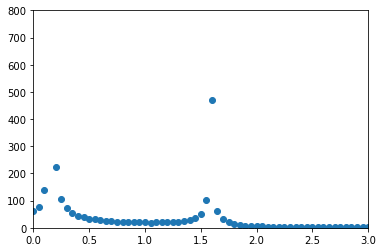

In [6]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 1000

yf = fft(x)
xf = fftfreq(N, 1 / 50)
fig, ax = plt.subplots()
ax.set_xlim(0, 3)
ax.set_ylim(0,800)
plt.plot(xf, np.abs(yf),'o')

plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [149]:
# Answer here

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [1]:
from scipy.signal import sawtooth

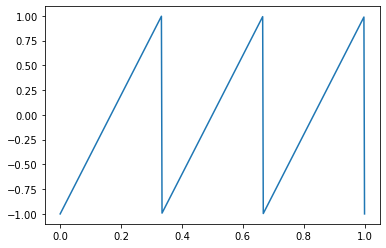

In [4]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 3 * t))

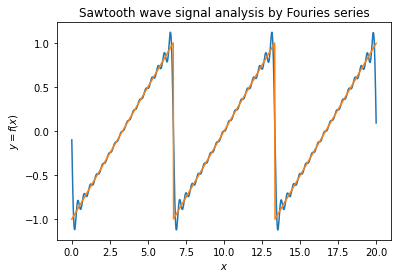

In [21]:
import numpy as np
from scipy.signal import square,sawtooth
import matplotlib.pyplot as plt
from scipy.integrate import simps
L=20 # Periodicity of the periodic function f(x)
freq=3 # No of waves in time period L
width_range=1
samples=1000
terms=50
# Generation of Sawtooth function

x=np.linspace(0,L,samples,endpoint=False)
y=sawtooth(2.0*np.pi*x*freq/L,width=width_range)
# Calculation of Co-efficients
a0=2./L*simps(y,x)
an=lambda n:2.0/L*simps(y*np.cos(2.*np.pi*n*x/L),x)
bn=lambda n:2.0/L*simps(y*np.sin(2.*np.pi*n*x/L),x)
# Sum of the series
s=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1,terms+1)])
# Plotting

plt.plot(x,s)
plt.plot(x,y)
plt.xlabel("$x$")
plt.ylabel("$y=f(x)$")
plt.title("Sawtooth wave signal analysis by Fouries series")
plt.savefig("fs_sawtooth.png")
plt.show()

<IPython.core.display.Javascript object>


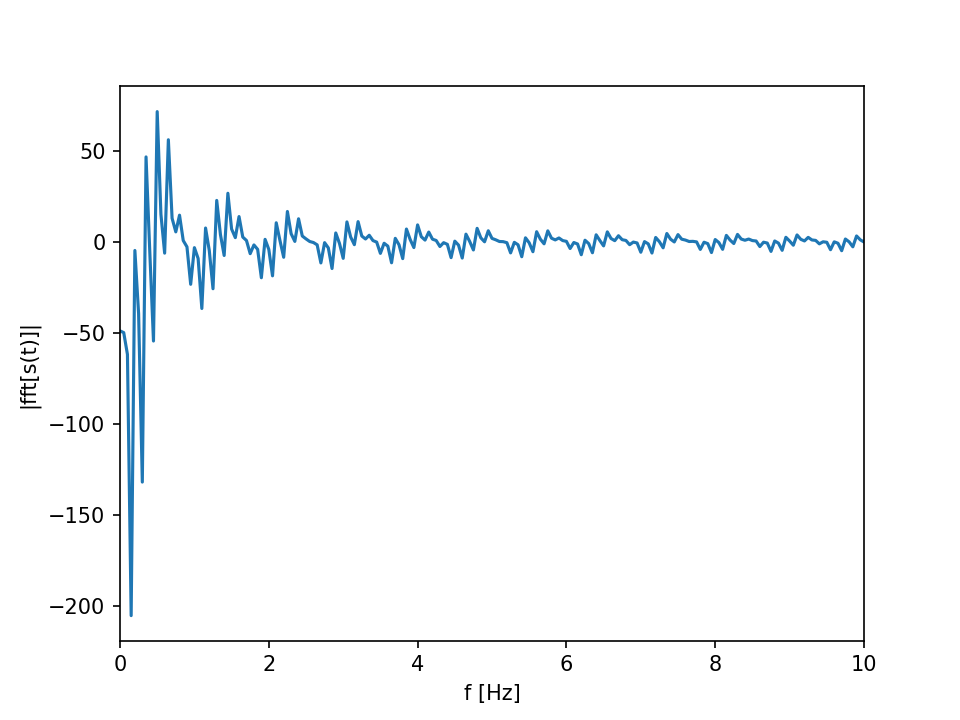

In [165]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 1000

yf = fft(s)
xf = fftfreq(N, 1 / 50)
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-200,400)
plt.xlabel("f[Hz]")
plt.ylabel("|fft[s(t)]|")
plt.plot(xf, np.abs(yf))

plt.show()

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('Sunspots.csv')
df.rename(columns={'Date':'datetime'},
          inplace=True)
df.head()

,Num,datetime,Monthly
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


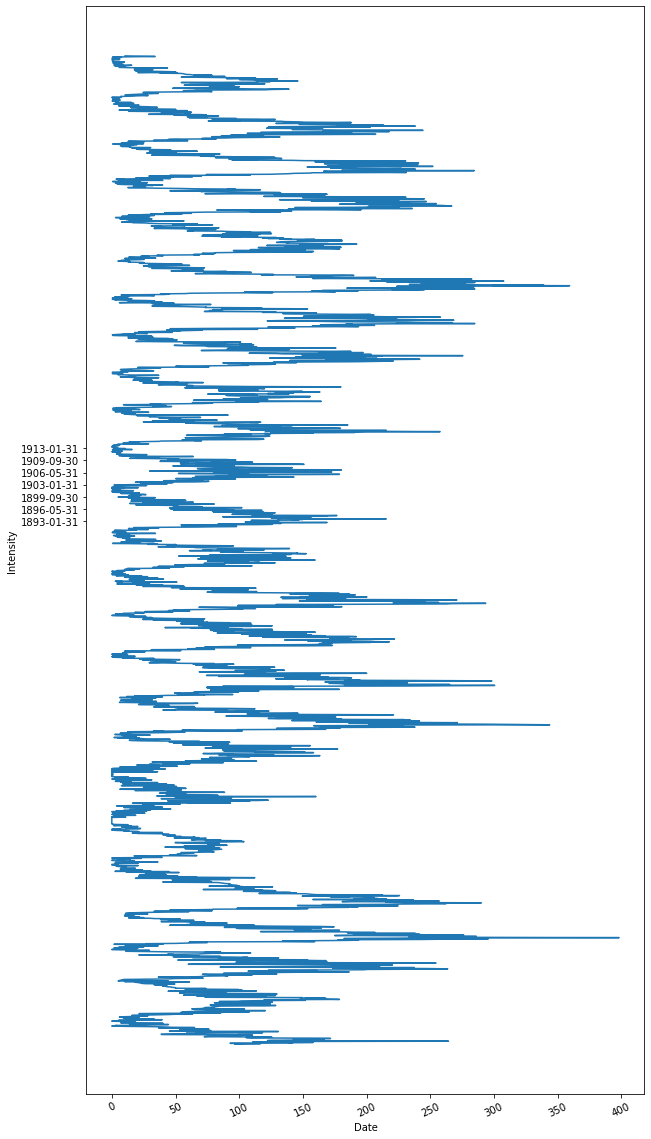

In [125]:
%matplotlib inline

plt.figure(figsize = (10, 20))
plt.plot(df['Monthly'],df['datetime'])

plt.yticks([1760-0o1-31,1800-0o1-31,1840-0o1-31,1880-0o1-31,1920-0o1-31,1960-0o1-31,2000-0o1-31])
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.xticks(rotation=25) 
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

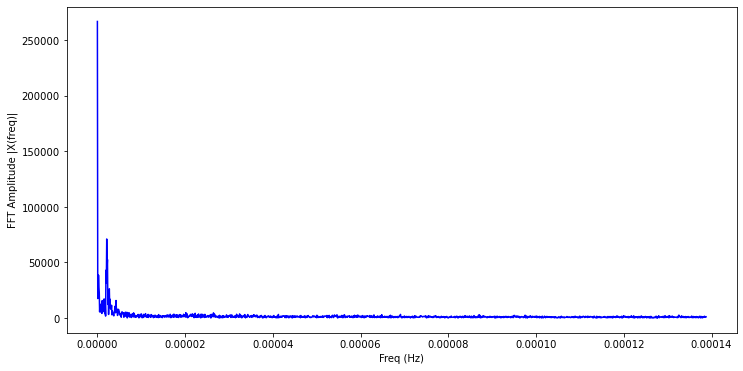

In [126]:

X = fft(df['Monthly'].values)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

C:\Users\Asal\AppData\Local\Temp/ipykernel_2452/2616177327.py:2: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


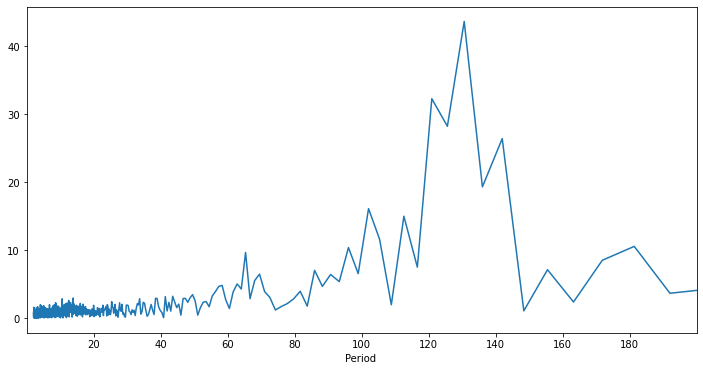

In [127]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([20,40,60,80,100,120,140,160,180])
plt.xlim(0, 200)
plt.xlabel('Period ')
plt.show()

In [ ]:
#These peaks mean that we see some repeating signal 

In [328]:
# The main period is: ...

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

ValueError: x and y must have same first dimension, but have shapes (3265,) and (10, 10)

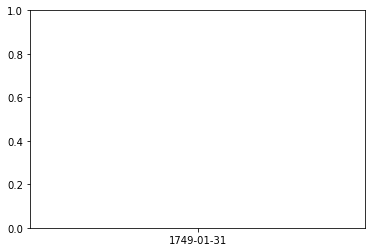

In [119]:
from scipy.fft import ifft
plt.plot(df['datetime'],ifft(X))
plt.show()

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [394]:
# Explain here ...

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [120]:
dg = pd.read_csv('2pcf.txt',delimiter = '\t',names=['pcf'])
print(dg)

          pcf
0      0.0000
1     -0.5803
2     -0.9645
3     -0.7912
4     -0.6154
...       ...
99995  1.8084
99996  1.8084
99997  2.2739
99998  1.4093
99999  1.4093

[100000 rows x 1 columns]


array([[<AxesSubplot:title={'center':'pcf'}>]], dtype=object)

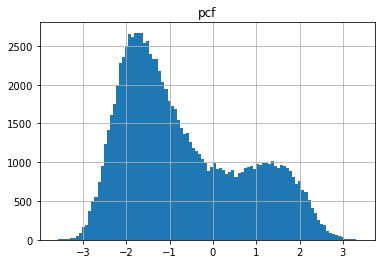

In [121]:
dg.hist(bins=100)

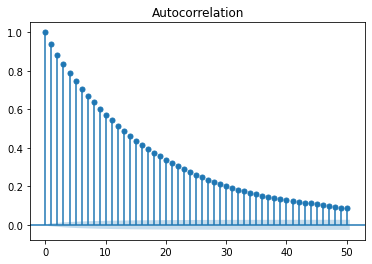

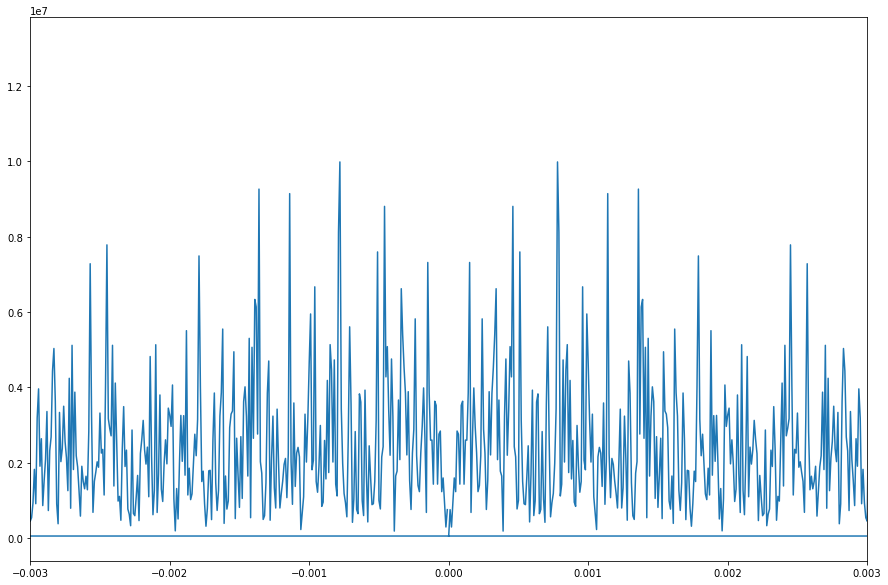

In [132]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dg['pcf']);
s= dg.pcf.values
s=s-np.mean(s)
s= s/np.std(s)

autocorrelation=np.correlate(s, s, mode="full") 
autocorrelation = autocorrelation[autocorrelation.size//2:]
F=fft( autocorrelation )
K=fftfreq(len(dg),1)
plt.figure( figsize=(15,10) )
plt.xlim(-.003,.003)
plt.plot(K,abs(F))

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

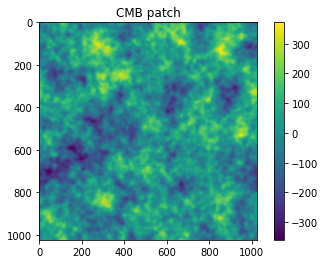

In [4]:
...

In [ ]:
# Your answers here